In [1]:
!wget "https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/6)%20Time%20Series%20Models/SARIMA/GlobalTemperatures.csv"

--2024-12-10 08:27:06--  https://media.githubusercontent.com/media/pradeep-016/ML_Course/refs/heads/main/6)%20Time%20Series%20Models/SARIMA/GlobalTemperatures.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205875 (201K) [text/plain]
Saving to: ‘GlobalTemperatures.csv’

GlobalTemperatures. 100%[===================>] 201.05K  --.-KB/s    in 0.03s   

2024-12-10 08:27:06 (5.74 MB/s) - ‘GlobalTemperatures.csv’ saved [205875/205875]



In [3]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [8]:
data = pd.read_csv('GlobalTemperatures.csv')
data.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data['dt'] = pd.to_datetime(data['dt'])
data = data.set_index('dt')
data = data[['LandAverageTemperature']]
data = data.dropna()
data = data.resample('ME').mean()

In [10]:
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

In [11]:
train_data['LandAverageTemperature'] = train_data['LandAverageTemperature'].interpolate(method='time')

In [12]:
model = auto_arima(train_data,
                   seasonal=True,
                   m=12,
                   stepwise=True,
                   trace=True,
                   suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=6659.611, Time=18.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=11835.137, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=2.28 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=10190.670, Time=4.51 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=11833.142, Time=0.10 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=7441.257, Time=14.92 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=18.34 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=6978.659, Time=62.05 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=7172.375, Time=46.02 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=7448.575, Time=6.58 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=7416.362, Time=40.45 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=45.04 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=45.27 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=16.60 sec
 ARIMA(2,1,1)(1,0,1)[12] interce

In [13]:
print(model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                 2553
Model:             SARIMAX(2, 1, 3)x(1, 0, [1, 2], 12)   Log Likelihood               -3306.736
Date:                                 Tue, 10 Dec 2024   AIC                           6633.472
Time:                                         08:47:45   BIC                           6691.919
Sample:                                     01-31-1750   HQIC                          6654.669
                                          - 09-30-1962                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -2.45e-06   4.77e-06     -0.514      0.607   -1.18e-05     6.9

In [14]:
forecast = model.predict(n_periods=len(test_data))
forecast_index = test_data.index

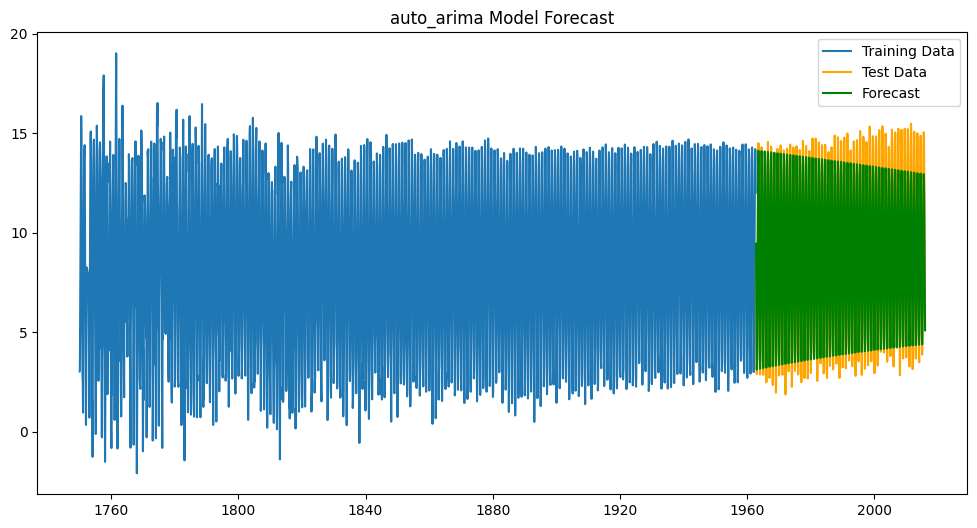

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data', color='orange')
plt.plot(forecast_index, forecast, label='Forecast', color='green')
plt.title('auto_arima Model Forecast')
plt.legend()
plt.show()

In [16]:
mae = mean_absolute_error(test_data, forecast)
rmse = mean_squared_error(test_data, forecast, squared=False)
mape = np.mean(np.abs((test_data.values.flatten() - forecast) / test_data.values.flatten())) * 100

evaluation_metrics = {
    'Mean Absolute Error (MAE)': mae,
    'Root Mean Squared Error (RMSE)': rmse,
    'Mean Absolute Percentage Error (MAPE)': mape
}

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
print("Evaluation Metrics:")
print(evaluation_metrics)

Evaluation Metrics:
{'Mean Absolute Error (MAE)': 0.6715662688536155, 'Root Mean Squared Error (RMSE)': 0.8688886067855109, 'Mean Absolute Percentage Error (MAPE)': 9.23309740044873}


In [20]:
print(forecast)

1962-10-31     9.449969
1962-11-30     6.211140
1962-12-31     4.008520
1963-01-31     3.129109
1963-02-28     3.625348
                ...    
2015-08-31    12.598554
2015-09-30    11.289124
2015-10-31     9.311721
2015-11-30     6.800452
2015-12-31     5.100506
Freq: ME, Length: 639, dtype: float64


In [23]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
forecast_scaled = scaler.transform(forecast.values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [24]:
forecast_scaled_df = pd.DataFrame({
    'Date': forecast_index,
    'Original_Forecast_Scaled': forecast_scaled.flatten()
}).set_index('Date')

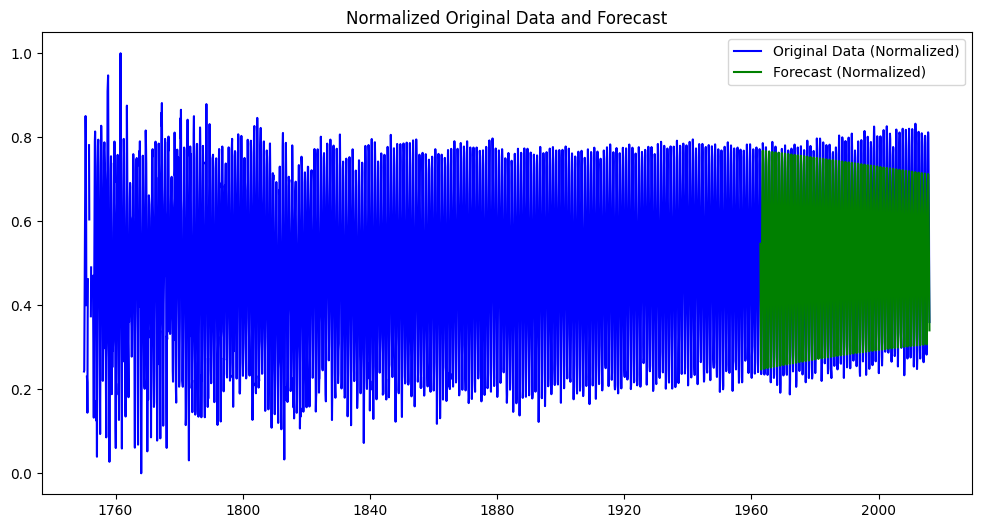

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data_scaled, label='Original Data (Normalized)', color='blue')
plt.plot(forecast_scaled_df.index, forecast_scaled_df, label='Forecast (Normalized)', color='green')
plt.title('Normalized Original Data and Forecast')
plt.legend()
plt.show()